<center><h1> - How the Earth shakes: triggering and seismic cycle.</h1></center>

## Table of contents <a id='Table'></a>
[Introduction](#Introduction)
1. [Scientific approach](#1)
2. [Single block model](#2)
    1. [Equations](#2.1)
    2. [Friction law](#2.2)
    3. [Numerical implementation](#2.3)
    4. [Study of parameters](#2.4)
3. [Multi-blocks model](#3)
    1. [Equations](#3.1)
    2. [Numerical implementation](#3.2)
    3. [Interpretation](#3.3)
    4. [Analysis](#3.4)
5. [Conclusion](#5)

## Introduction <a name="Introduction"></a>
<div style="text-align: right"
     
[Table of contents](#Table)

The lithosphere, the outermost layer of the Earth, is composed of around a dozen plates of varying sizes. These tectonic plates are in motion, moving from a few millimeters to several centimeters per year. These movements create stresses at their boundaries, resulting in the accumulation of immense energy. When this energy exceeds the breaking threshold of the rocks within the plates, an earthquake or seismic event occurs. The energy is suddenly released, and the rocks slide along the fault. <br>
In other words, this is a problem of contact instability between two solids, involving interactions between a reservoir of potential energy (the accumulated deformation within the plates) and a rough and heterogeneous interface with a behavior law that is initially unknown.<br>
A simple model to represent such a system is a block equipped with a spring and a slider, accompanied by a "softening" friction law. This type of model is called the "Burridge-Knopoff model.
<br>
<div style="text-align: center;">
	<img src="./bloc-diagramme-bilan-seisme-Hachette.webp" width="400">
</div>
<br>
<center><i>Fig. 1 - Representation of a seismic fault </i></center>

## Scientific approach <a name="1"></a>
<div style="text-align: right"
     
[Table of contents](#Table)

In order to obtain the Gutenberg-Richter law, we need to simulate a very large number of seismic events to statistically analyze the results. Thanks to our preliminary research on the Burridge-Knopoff model, we have an idea of the overall behavior of our simulation.
<br>
First step
<br>
To begin with, we sought to understand a simplified model of the Burridge-Knopoff system consisting of only one block. Our goal is to ensure that the applied numerical scheme is correct and, most importantly, to find parameters (spring stiffness, friction law, etc.) that will bring us closer to the expected results.
<br>
In a second step, we implemented the model with N blocks in a chain, and then we analyzed it to obtain the desired graphs (magnitude-frequency).
<br>
One important thing to keep in mind is that, since the quantities we use throughout our modeling are non-physical and dimensionless, only the shape of the curves will actually be faithful to reality. This is suitable for our purpose as we aim to demonstrate the linearity of the seismic distribution curve.

## Single block model <a name="2"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

<div style="text-align: center;">
	<img src="./schema 1 bloc.png" width="170">
</div>
<br>
<center><i>Fig. 2 -Representation of the simplified Burridge-Knopoff model applied to a single block</i></center>

####  Equations <a name="2.1"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

Let  $U(t)$ be the position of the block at instant  $t$.
</br>Dynamically, the balance of forces on the block is:
- Friciton: $\vec F_{frott}$ in the direction $-\vec u_x$
- Spring restoring force. : $\vec F_c = k_c (V_c\times t-U(t))\cdot \vec u_x$


</br>Finally, the applied Fundamental Principle of Dynamics  on the block gives us:
$$
m\ddot U(t) = k_c (V_c\times t-U(t)) - F_{frott}
$$

#### Friciton law <a name="2.2"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

<div style="text-align: center;">
	<img src="./Graph frottement.png" width="300">
</div>
<br>
<center><i>Fig. 3 -Graph of the friction law used </i></center>

The friction law under consideration is referred to as "softening" friction, where friction decreases with the sliding distance until it reaches a constant threshold. It is this friction law that makes our model unique. The various parameters that can be adjusted include:
- $d_c$ : The sliding distance before reaching linear behavior.
- $\mu_s$ : The static friction coefficient has been exceeded to transition into sliding.
- $\mu_s$ : The dynamic friction coefficient in the linear regime.

#### Numerical implementation<a name="2.3"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

<div class="alert alert-success">

The code within this section should be executed to obtain a graph.
</div>

Initialisation of the parameters :

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Niter = int(1e5)
dt = 1e-1

k = 1
vc = 0.0001
m = 1

mu_s = 0.25
mu_d = 0.2
dc = 1e-6

T = np.arange(0, (Niter+1)*dt, dt)
U = np.array([0.0 for i in range(Niter+1)])
V = np.array([0.0 for i in range(Niter+1)])
A = np.array([0.0 for i in range(Niter+1)])

The explicit formula for the frictional force and the spring force is:

In [2]:
def frottement(u):
    global u0
    if u-u0 < dc:
        return (u-u0)*(mu_d-mu_s)/dc + mu_s
    else:
        return mu_d
    
def f_ressort(t,u):
    return k*(vc*t - u)


To determine whether the solver should be dynamic or static in the next iteration, we test if all forces, except for the added friction, exceed $\mu_s$. If this is the case, we switch to dynamic mode (Sliding = True). Otherwise, U[i+1] = U[i].
<br>
Sliding only stops when the block begins to move backward, which we consider as impossible in our model. This no-backward movement is characterized by the test V[i+1] < 0.
<br>
Finally, in the case where we are in dynamic mode, we use a one-step Verlet scheme to find the position U and velocity V at the next time step, based on the forces acting on the block:
$$U_{i+1} = U_i + dt\times V_i + \frac{dt^2}{2}\times A_i$$
$$V_{i+1} = V_i + dt\times\frac{A_i + A_{i+1}}{2}$$

In [3]:
glissement = False
u0 = 0 
for i in range(Niter):
    if glissement:
        U[i+1] = U[i] + dt*V[i] +dt**2*(f_ressort(T[i], U[i])  - frottement(U[i]))/(2*m)
        V[i+1] = V[i] + dt*(f_ressort(T[i], U[i])  - frottement(U[i]) + f_ressort(T[i+1], U[i+1])- frottement(U[i+1]))/(2*m)
    else:
        U[i+1] = U[i]
    
    if f_ressort(T[i+1], U[i+1]) >= mu_s:
        glissement = True
        u0 = U[i+1]       #position at the beginning of the sliding
    
    if V[i+1] < 0 :
        glissement = False

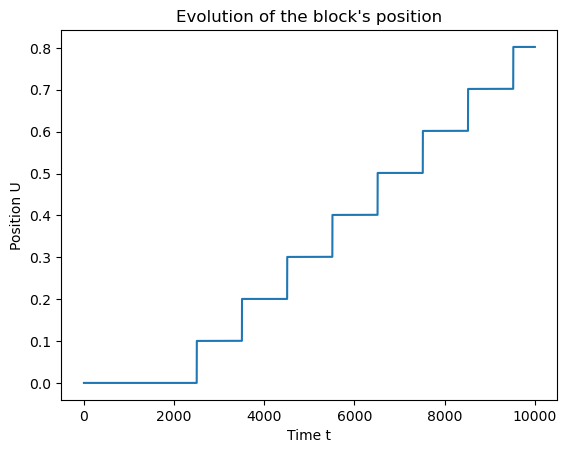

In [4]:
plt.plot(T,U)
plt.xlabel('Time t')
plt.ylabel('Position U')
plt.title("Evolution of the block's position")
plt.show()

Now that the code is working, we will test the impact of various parameters on the shape of the curve. The goal is to have very short sliding phases compared to the duration of static phases (the graph obtained above is already optimized).

#### Study of parameters <a name="2.4"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

<div style="text-align: center;">	
	<img src="./param_vc.png">
    <img src="./param_mu_s.png">
</div>
</br>
<center><i>Fig. 4 - Examples of figures obtained during the parametric study</i></center>

After plotting similar figures for different values, we have reached the following conclusion: for optimal results, $\mu_d$ and $\mu_s$ should be very close, $v_c$ and $d_c$ very small, and $N_{iter}$ sufficiently large. The parameters we have selected are:

In [5]:
Niter = int(1e5)
dt = 1e-1

k = 1
vc = 0.0001
m = 1

mu_s = 0.25
mu_d = 0.2
dc = 1e-6

## N blocs <a name="3"></a>
<div style="text-align: right"
     
[Retour au sommaire](#Sommaire)

Now that we have a working model, we will make it more complex.

<div style="text-align: center;">	
	<img src="./schema N blocs.png">
</div>
</br>
<center><i>Fig. 5 - Representation of the Burridge-Knopoff's model</i></center>

#### Equations <a name="3.1"></a>
<div style="text-align: right"
     
[Retour au sommaire](#Sommaire)

Blocks numbered by $i \in [1, N]$, with $U_i(t)$ representing the position of block $i$ at instant $t$.
</br>Dynamically, the force balance on block $i$ is:
- Friction : $\vec F_{frott}$ in the direction $-\vec u_x$
- Loading spring restoring force : $\vec F_c = k_c ((i-1)*a + V_c\times t-U_i(t))\cdot \vec u_x$
- Left spring : $\vec F_{gauche} = -k_p (U_i(t) - U_{i-1}(t) - a)\cdot \vec u_x$
- Right spring : $\vec F_{droite} = k_p (U_{i+1}(t) - U_i(t) - a)\cdot \vec u_x$

</br>Finally, the Fundamental Principle of Dynamics applied to the block $i$ gives us: :
$$
\begin{cases}
    \begin{align}
        m\ddot U_1(t) &= k_c (V_c\times t-U_1(t)) + k_p (U_2(t) - U_1(t) - a) - F_{frott}\\
        m\ddot U_i(t) &= k_c ((i-1)\times a + V_c\times t-U_i(t)) + k_p (U_{i+1}(t) - 2U_i(t) + U_{i-1}(t)) - F_{frott} & \forall i, 1<i<N\\
        m\ddot U_N(t) &= k_c ((N-1)\times a + V_c\times t-U_N(t)) - k_p (U_N(t) - U_{N-1}(t) - a) - F_{frott}
    \end{align}
\end{cases}
$$

#### Numerical implementation <a name="3.2"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

<div class="alert alert-success">

The code in this section takes about 30 seconds to execute. An animation representing the final graph obtained is available if you wish.
</div>

Parameters Initialisation

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import json


Niter = int(1e5)
precision = 1
dt = 10**(-precision)
Nbloc = 50

alea = 20               #Percentage of randomness in the initial position
 
a = l0 = 0.01           #distance between blocks at equilibrium

kc = 1
vc = 0.0001
kp = 100
m = 1

mu_s = 0.25
mu_d = 0.2
dc = 1e-6


T = np.arange(0, (Niter+1)*dt, dt)   #time
U = np.zeros((Niter+1,Nbloc))        #position
V = np.zeros((Niter+1,Nbloc))        #velocity
A = np.zeros((Niter+1,Nbloc))        #acceleration

liste_Gliss = np.zeros((Niter+1,Nbloc), dtype = bool)   #contains history of sliding of each block (if block i slid at time t...).

U[0,:] = [i*a + a*(random.randint(100-alea,100+alea)/100) for i in range(Nbloc)]
print(U[0,:])

T0 = [0 for i in range(Nbloc)]      #list containing instants when every block started sliding

[0.0098 0.0185 0.0282 0.0407 0.0496 0.0602 0.0698 0.081  0.091  0.0996
 0.1082 0.1181 0.1307 0.1384 0.1508 0.1581 0.1703 0.1807 0.1895 0.1994
 0.2109 0.218  0.2318 0.242  0.2505 0.2592 0.2713 0.2798 0.2905 0.301
 0.3114 0.3209 0.3313 0.3415 0.3505 0.3586 0.371  0.3809 0.3895 0.4017
 0.4108 0.4182 0.4303 0.4416 0.4498 0.4615 0.4713 0.4796 0.4889 0.5005]


Explicit formula for the frictional force and the spring:

In [7]:
def frottement(t,p):
    global U, T0
    if (U[t,p] - U[T0[p],p]) < dc:
        return (U[t,p]-U[T0[p],p])*(mu_d-mu_s)/dc + mu_s
    else:
        return mu_d
    
def f_ressorts(t,p):
    global T, U
    if p == 0:
        return kc*(p*a + vc*T[t] - U[t,p]) + kp*(U[t,p+1] - U[t,p] - l0)
    
    elif p == Nbloc-1:
        return kc*(p*a + vc*T[t] - U[t,p]) - kp*(U[t,p] - U[t,p-1] - l0) 
    
    else :
        return kc*(p*a + vc*T[t] - U[t,p]) + kp*(U[t,p+1] - 2*U[t,p] + U[t,p-1])

Just as with one block, we use the Verlet scheme:
$$U_{t+1} = U_t + dt\times V_t + \frac{dt^2}{2}\times A_it$$
$$V_{t+1} = V_t + dt\times\frac{A_t + A_{t+1}}{2}$$
However, now the term $A_{t+1}$ (which is the force from the springs) depends on the positions of the two blocks adjacent to the considered block at time $t+1$, which we have not yet calculated at that moment. Therefore, we have chosen to loop twice over the blocks in the time loop: the first time, we calculate the new positions of all the blocks, and in the second loop, we calculate the velocities and test if the blocks are sliding.

In [8]:
for t in range(Niter):
    for p in range(Nbloc):  
        if liste_Gliss[t,p]:
            U[t+1,p] = U[t,p] + dt*V[t,p] + dt**2*(f_ressorts(t,p)  - frottement(t,p))/(2*m)
            
        else:
            U[t+1,p] = U[t,p]
        
    for p in range(Nbloc):
        if liste_Gliss[t,p]:
            V[t+1,p] = V[t,p] + dt*(f_ressorts(t, p)  - frottement(t,p) + f_ressorts(t+1,p)- frottement(t+1,p))/(2*m)
        
        if f_ressorts(t+1, p) >= mu_s:
            liste_Gliss[t+1,p] = True        #triggers sliding
            T0[p] = t+1
        
        if V[t+1,p] < 0 :
            liste_Gliss[t+1,p] = False
        
        elif liste_Gliss[t,p]:              #If we were sliding in the previous time step, and the velocity is not negative, we continue.
            liste_Gliss[t+1,p] = True

Graphical display

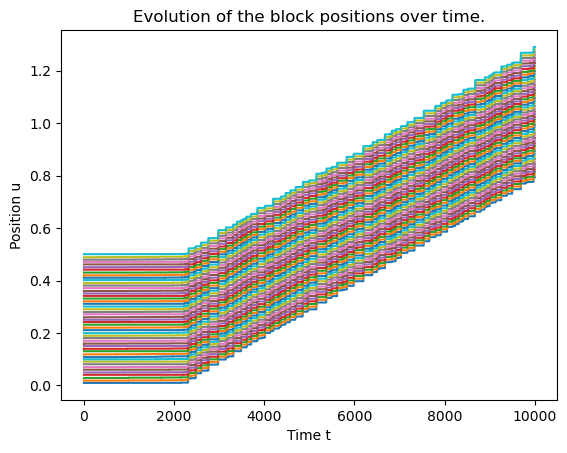

In [9]:
plt.clf()
for p in range(Nbloc):
    plt.plot(T,U[:,p],label=f"bloc {p}")

plt.xlabel('Time t')
plt.ylabel('Position u')
plt.title('Evolution of the block positions over time.')
plt.show()

<div class="alert alert-success">

Le code ci-dessous est à executer pour obtenir une animation
</div>

In [ ]:
from IPython.display import HTML


HTML("""
    <video width = "1000" alt="test" controls>
        <source src="./Animation.mp4" type="video/mp4">
    </video>
""")

#### Interpretation of events <a name="3.3"></a>
<div style="text-align: right"
     
[table of contents](#Sommaire)

A seismic event is defined as a period during which at least one block is sliding. Using the history contained in the liste_Gliss, we can retrieve these events and store them in a dictionary in the following format
 : <br>{ "event_i": [start_event, end_event, start_position_event, end_position_event] }

In [11]:
dicoEvenement = {}
i = 0
while i < Niter:
    if True in liste_Gliss[i,:] :
        debut_event = i
        while True in liste_Gliss[i,:] and i < Niter :
            i += 1
        fin_event = i
        
        num_event = len(dicoEvenement)
        dicoEvenement[f"event_{num_event}"] = [debut_event, fin_event, U[debut_event,:], U[fin_event,:]]
    i += 1

We can then plot the profile for each event on a graph, which represents the distance traveled by each block. Each line represents a different event.

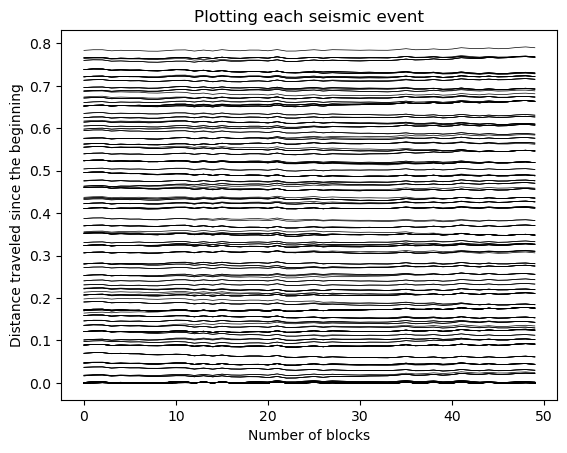

In [12]:
plt.clf()
for (key, value) in dicoEvenement.items():
    pos_debut_event = value[2]
    pos_fin_event = value[3]
    deplacement = pos_fin_event - U[0,:]
    liste_x = [i for i in range(Nbloc)]
    plt.plot(liste_x, deplacement, color='k', lw=0.5)
plt.xlabel('Number of blocks')
plt.ylabel('Distance traveled since the beginning')
plt.title('Plotting each seismic event')
plt.show()

#### Data analysis <a name="3.4"></a>
<div style="text-align: right"
     
[Table of contents](#Sommaire)

This final curve then allowed us to calculate the magnitude of each event, which is the distance slid during an event multiplied by the size of the sliding patch. In practice, we perform the integral of both curves (before and after sliding), and the difference provides us with the magnitude.

In [13]:
liste_magnitude = []
for event in dicoEvenement.values():
    t_debut = event[0]
    t_fin = event[1]
    pos_debut = event[2]
    pos_fin = event[3]


    aire_deb = 0
    aire_fin = 0
    for num_bloc in range(len(pos_debut)-1):
        pos_bloc_n = (pos_debut[ num_bloc]  + pos_fin[num_bloc])/2
        pos_bloc_n_plus_1 = (pos_debut[num_bloc+1]  + pos_fin[num_bloc+1])/2
        largeur = pos_bloc_n_plus_1 - pos_bloc_n
        
        #At the beginning of the 'event : 
        hauteur_deb = (pos_debut[num_bloc] + pos_debut[num_bloc+1])/2
        aire_deb += largeur * hauteur_deb
        
        #At the end of the event : 
        hauteur_fin = (pos_fin[num_bloc] + pos_fin[num_bloc+1])/2
        aire_fin += largeur * hauteur_fin

    magnitude = aire_fin - aire_deb
        
    liste_magnitude.append(magnitude)

We then proceed to calculate the frequency for each magnitude. This frequency represents the ratio between the number of events larger than the considered magnitude and the total number of events.

<br><br>To do this, we sort the liste_magnitude in descending order. The first element is the largest, so its frequency is very low: $1/N_{event}$. The last event in the list, on the other hand, is the smallest; all events are larger than it, so its frequency is 1. The formula for event number $i$ is: $i/N_{event}$.

In [14]:
liste_magnitude.sort()

liste_freq = []
N_event = len(liste_magnitude)
for i in range(0, N_event):
    liste_freq.append(1 - i/N_event)      #Here, we are doing the opposite compared to the explanations because the list is sorted in the other direction.

We can now plot the frequency-magnitude distribution curve on a log-log scale and observe the result:

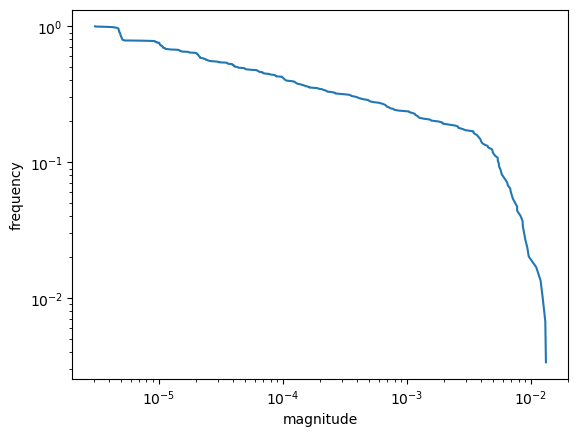

In [15]:
plt.clf()
plt.plot(liste_magnitude, liste_freq)
plt.xlabel("magnitude")
plt.ylabel("frequency")
plt.loglog()
plt.show() 

We can clearly observe a nearly linear behavior between $5 \times 10^{-3}$ and $10^{-5}$.

Another example of a curve obtained with the same parameters as before, but by reducing $k_p$. In the second graph, we can observe that the fault is less cohesive, and the blocks slide in smaller groups.

<div style="text-align: center;">	
	<img src="./Figure_1.png" width="500">
    <img src="./Figure_2.png" width="500">
    <img src="./Figure_3.png" width="500">
</div>
</br>
<center><i>Fig. 6 -another example obtained using $k_p=10$</i></center>
</br></br>


To further improve the results, we have noticed that the curve becomes more linear as the number of blocks increases. Increasing $N_{bloc}$, $N_{iter}$ and decreasing $v_c$ are therefore easy ways to improve our results. However, the simulations become extremely resource-intensive and memory-demanding, which has posed limitations for us.


## Conclusion <a name="5"></a>
<div style="text-align: right"
     
[Retour au sommaire](#Sommaire)

Our simulations have allowed us to obtain a frequency-magnitude curve similar to the Gutenberg-Richter distribution law. On this curve, we can observe two distinct behaviors: a linear portion and a curved portion for high magnitudes.
<br><br>
- The generally linear zone represents the numerous "internal" slips within the fault. These are earthquakes with low to intermediate magnitudes caused by the movement of blocks less than the total number of blocks within the fault. This result is physically representative of the Gutenberg-Richter type frequency-magnitude relationship observed in statistical studies of a large number of earthquakes.
<br><br>
-The curved part towards very high magnitudes is due to boundary conditions. Indeed, the modeled fault's size cannot be infinite. Therefore, when all the blocks slide, we obtain a high magnitude, but this event is very rare. This rarity is attributed to the characteristic size of the fault, which in our simulation corresponds to the number of blocks multiplied by the inter-block distance, here 0.01. In theory, with an infinitely long fault, the linear behavior should be the only one present in this graph. As a result, we will not consider the few data points with high magnitudes.

In the end, we modeled a one-dimensional N-block Burridge-Knopoff system with the goal of verifying the Gutenberg-Richter law. Our algorithmic implementation, including the use of a one-step Verlet scheme, allowed us to confirm this statistical law. Thus, we have achieved the objectives set at the beginning of the project, which was to obtain a linear frequency-magnitude distribution law.